## Simulated 2-D Sweep Scanner with Line-of-Sight Occlusion
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What does this program do?
Imagine a LiDAR sensor stationed at one of the edges of a grid (you can imagine it to be on the side of a vehicle or building), sweeping across the directions left-to-right. As it scans, it is also constantly updating it's understanding of what is visible and what is blocked. This is the principle on which a Terrestrial LiDAR scanner operates while scanning urban corridors, building facades, or linear assets like tunnels or roads.

#### i. Importing the required libraries:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


#### ii. Loading and cleaning the original (reduced) dataset:

In [2]:
# Load original point cloud from reduced set (first column only)
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'
df = pd.read_csv(url)
df = df[['x', 'y']].copy()
df.columns = ['X', 'Y']
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df = df.dropna().reset_index(drop=True)


#### iii. Computing the angle and distance for each point:

In [3]:
# Compute angle and distance from scanner at (0,0)
df['Angle'] = np.degrees(np.arctan2(df['Y'], df['X']))  # angle in degrees
df['Angle'] = (df['Angle'] + 360) % 360  # normalize to [0, 360)
df['Distance'] = np.sqrt(df['X']**2 + df['Y']**2)


#### iv. Defining the FOV and keeping the furthest point per slice:

In [4]:
# Define FOV slice width (e.g., 1 or 2 degrees)
fov_step = 2  # try 1 or 2
df['AngleBin'] = (df['Angle'] // fov_step).astype(int)

# For each angle bin, keep only the furthest point (maximum distance)
df_furthest = df.loc[df.groupby('AngleBin')['Distance'].idxmax()]


#### v. Plotting the sparse 'furthest' surface:

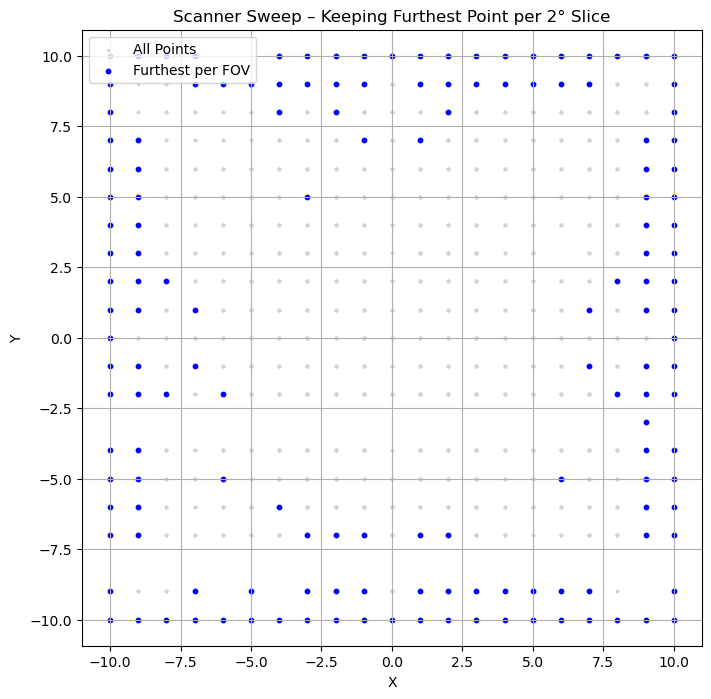

In [5]:
# Visualize furthest point per slice around scanner
plt.figure(figsize=(8, 8))
plt.scatter(df['X'], df['Y'], color='lightgray', s=2, label='All Points')
plt.scatter(df_furthest['X'], df_furthest['Y'], color='blue', s=10, label='Furthest per FOV')
plt.title(f"Scanner Sweep – Keeping Furthest Point per {fov_step}° Slice")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
